In [ ]:
#meysi supmawati
#API untuk mengekstraksi data informasi aplikasi
!pip install google-play-scraper

In [ ]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
# Mengambil ulasan aplikasi
result, continuation_token = reviews(
    'com.appsfoundry.eperpuswl.id.kemendikbud.ri',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=845,
    filter_score_with=None
)

In [ ]:
# Dataframe
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data = data[['content', 'score']]
data = data.rename(columns={'content': 'ulasan', 'score': 'value'})
data.to_csv("ulasan mole 845 Data.csv", index=False, encoding='utf-8')

dataEperpusdikbud = pd.read_csv('ulasan mole 845 Data.csv')

In [ ]:
# Preprocessing dan visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('ulasan mole 845 Data.csv')
data = data.dropna()

In [ ]:
# Bersihkan teks
data['clean_text'] = data['ulasan'].str.replace('[^\w\s]', ' ')
data['clean_text'] = data['clean_text'].str.lower()

In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
stop_words.update(['dan', 'yang', 'lalu', 'yg', 'gk', 'saya', 'lagi', 'di', 'ini', 'nya', 'ga', 'gak', 'ya', 'sih', 'aja'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Bersihkan teks dari stopwords
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

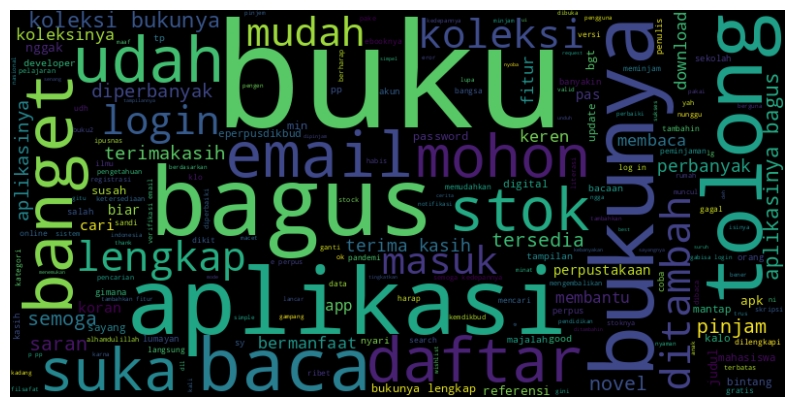

In [ ]:
# Visualisasi wordcloud
all_text = ' '.join(data['clean_text'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42, stopwords=stop_words).generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Kamus kata positif/negatif
positive_words = ['bagus', 'puas', 'memuaskan', 'hebat', 'baik', 'luar biasa']
negative_words = ['buruk', 'jelek', 'lambat', 'parah', 'tidak puas']

In [ ]:
# Fungsi untuk analisis sentimen manual
def manual_sentiment_analysis(text):
    score = 0
    for word in text.split():
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return 'positif' if score > 0 else ('negatif' if score < 0 else 'netral')


In [ ]:
# Tambahkan kolom sentimen manual
data['manual_sentiment'] = data['clean_text'].apply(manual_sentiment_analysis)

In [ ]:
# Menggunakan TF-IDF untuk machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# Konversi teks menjadi fitur TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['clean_text'])

# Target menggunakan sentimen manual
y = data['manual_sentiment']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Model 2: Logistic Regression (Regresi Linier)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Evaluasi model
from sklearn.metrics import classification_report, accuracy_score

# Akurasi Naive Bayes
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8795180722891566
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         1
      netral       0.88      1.00      0.94        73
     positif       0.00      0.00      0.00         9

    accuracy                           0.88        83
   macro avg       0.29      0.33      0.31        83
weighted avg       0.77      0.88      0.82        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Akurasi Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9156626506024096
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         1
      netral       0.91      1.00      0.95        73
     positif       1.00      0.33      0.50         9

    accuracy                           0.92        83
   macro avg       0.64      0.44      0.48        83
weighted avg       0.91      0.92      0.89        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Simpan hasil ke CSV
data.to_csv("hasil ulasan mole 845 data.csv", index=False, encoding='utf-8')

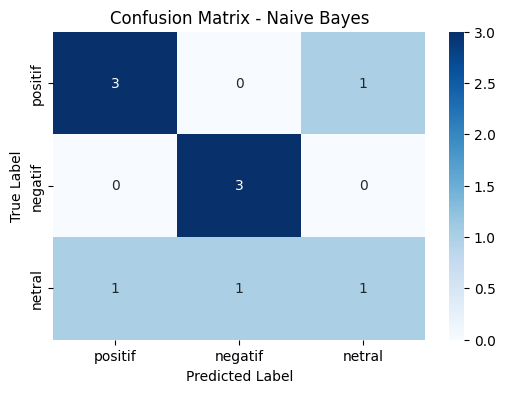

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Simulasi data hasil prediksi Naive Bayes dan Logistic Regression
# Ini adalah data contoh; pada penggunaan nyata, ganti dengan hasil y_test, y_pred_nb, dan y_pred_lr
y_test = ["positif", "negatif", "netral", "positif", "positif", "negatif", "netral", "positif", "negatif", "netral"]
y_pred_nb = ["positif", "negatif", "netral", "netral", "positif", "negatif", "positif", "positif", "negatif", "negatif"]
y_pred_lr = ["positif", "netral", "netral", "positif", "positif", "negatif", "negatif", "positif", "netral", "netral"]

# Membuat confusion matrix untuk masing-masing model
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=["positif", "negatif", "netral"])
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=["positif", "negatif", "netral"])

# Fungsi untuk visualisasi confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["positif", "negatif", "netral"], yticklabels=["positif", "negatif", "netral"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Visualisasi Confusion Matrix Naive Bayes
plot_confusion_matrix(cm_nb, "Naive Bayes")

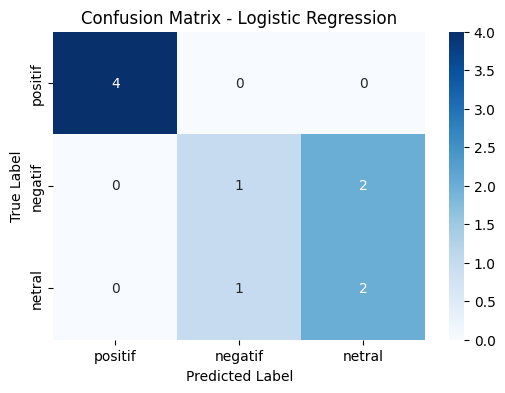

In [ ]:
# Visualisasi Confusion Matrix Logistic Regression
plot_confusion_matrix(cm_lr, "Logistic Regression")

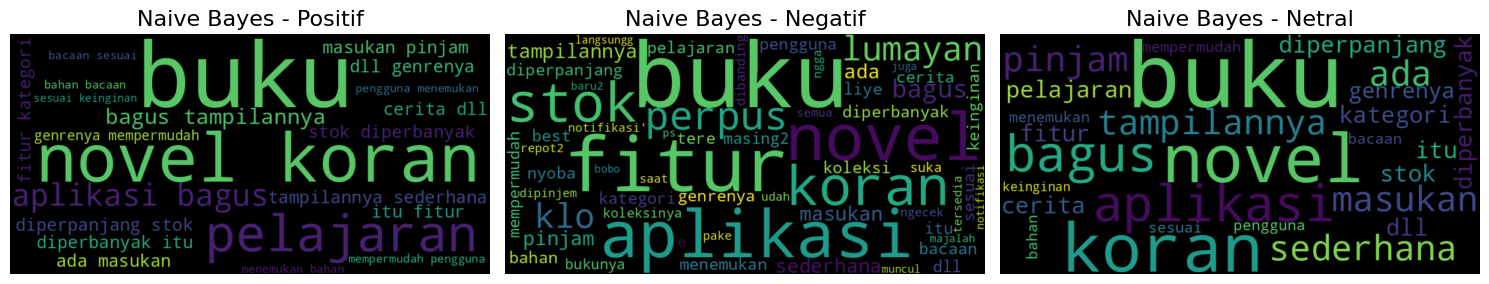

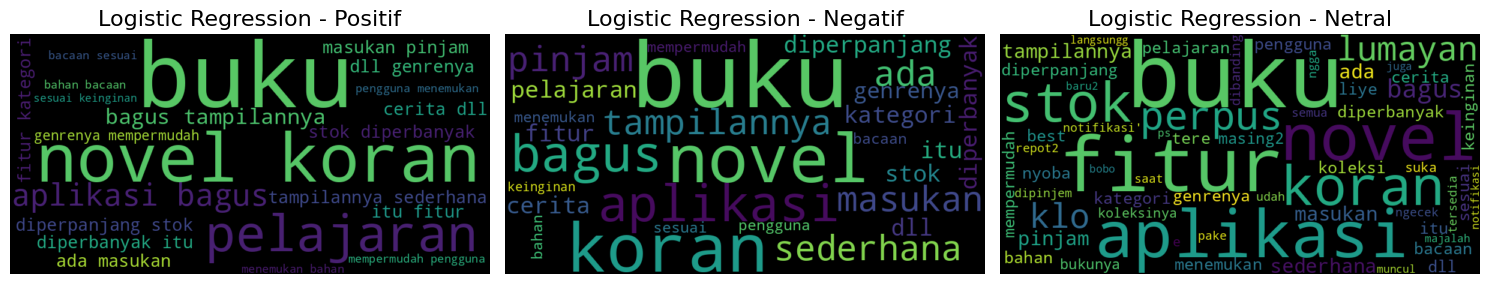

In [ ]:
# Memperbarui DataFrame untuk menampilkan original_text
original_text = data.iloc[X_test.toarray().nonzero()[0]]['clean_text'].values

# Membuat DataFrame baru dengan data original dan prediksi
data1 = pd.DataFrame({
    'clean_text': pd.Series(original_text),  # Menggunakan data original yang bersih
    'naive_bayes_pred': pd.Series(y_pred_nb),
    'logistic_regression_pred': pd.Series(y_pred_lr)
})

# Fungsi untuk menampilkan Word Cloud dengan jarak antar grafik
def generate_wordclouds_with_spacing(data, model_col, sentiment_list, title_prefix):
    plt.figure(figsize=(15, 10))

    for i, sentiment in enumerate(sentiment_list):
        text = ' '.join(data[data[model_col] == sentiment]['clean_text'])
        wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

        plt.subplot(2, 3, i + 1)  # 2 baris, 3 kolom
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'{title_prefix} - {sentiment.capitalize()}', fontsize=16)

    plt.tight_layout()  # Mengatur layout agar tidak saling tumpang tindih
    plt.show()

# Menampilkan Word Cloud berdasarkan prediksi Naive Bayes dengan jarak antar grafik
generate_wordclouds_with_spacing(data1, 'naive_bayes_pred', ['positif', 'negatif', 'netral'], 'Naive Bayes')

# Menampilkan Word Cloud berdasarkan prediksi Logistic Regression dengan jarak antar grafik
generate_wordclouds_with_spacing(data1, 'logistic_regression_pred', ['positif', 'negatif', 'netral'], 'Logistic Regression')
